# 02 - Feature Exploration

In this notebook, I'm exploring the engineered features to understand:
1. What features we have
2. Feature distributions and statistics
3. Feature correlations
4. Feature relationships with target variable (Result)
5. Missing values
6. Feature quality and usefulness

This helps us understand which features are most important for predicting match outcomes.


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")


Libraries imported successfully!


## Step 2: Load Feature Data


In [2]:
# Load the feature matrix
features_file = Path('../data/processed/arsenal_features.csv')

if features_file.exists():
    df = pd.read_csv(features_file)
    
    # Convert Date to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    print(f"✓ Loaded feature matrix: {features_file}")
    print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
    print(f"\nSeasons: {sorted(df['Season'].unique())}")
    
    # Show first few rows
    print(f"\nFirst few rows:")
    display(df.head())
else:
    print(f"Error: {features_file} not found!")
    print("Please run src/features.py first to create features.")


✓ Loaded feature matrix: ../data/processed/arsenal_features.csv

Shape: 952 rows × 24 columns

Date range: 2000-08-19 00:00:00 to 2017-05-21 00:00:00

Seasons: ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24', '2024-25', '2025-26']

First few rows:


,avg_goals_scored_last5,avg_goals_conceded_last5,avg_points_last5,avg_shots_last5,avg_shots_against_last5,avg_shots_target_last5,avg_shots_target_against_last5,goal_diff_last5,win_rate_last5,form_points_last5,Arsenal_Home,days_since_last_match,matchday,month,day_of_week,historical_win_rate_vs_opponent,previous_meetings,shot_conversion_rate,defensive_strength,attacking_strength,Result,Season,Date,Opponent
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,1,8.0,5.0,0.5,0,0.000000,NaN,NaN,Loss,2000-01,2000-08-19,Sunderland
1,0.000000,1.000000,0.00,14.000000,8.000000,7.000000,2.000000,-1.0,0.0,0.0,1,2.0,2,8.0,0.0,0.5,0,0.000000,1.000000,0.000000,Win,2000-01,2000-08-21,Liverpool
2,1.000000,0.500000,1.50,15.500000,7.500000,9.500000,3.000000,1.0,0.2,3.0,1,5.0,3,8.0,5.0,0.5,0,0.105263,0.500000,1.000000,Win,2000-01,2000-08-26,Charlton
3,2.333333,1.333333,2.00,16.333333,7.333333,9.333333,3.333333,3.0,0.4,6.0,0,11.0,4,9.0,2.0,0.5,0,0.250000,1.333333,2.333333,Draw,2000-01,2000-09-06,Chelsea
4,2.250000,1.500000,1.75,15.500000,8.500000,8.250000,3.750000,3.0,0.4,7.0,0,3.0,5,9.0,5.0,0.5,0,0.272727,1.500000,2.250000,Draw,2000-01,2000-09-09,Bradford


## Step 3: List All Features


In [3]:
# Separate features from metadata and target
feature_columns = [col for col in df.columns 
                  if col not in ['Result', 'Season', 'Date', 'Opponent']]

print(f"Total features: {len(feature_columns)}")
print(f"\nFeature categories:")
print("=" * 60)

# Categorize features
rolling_features = [f for f in feature_columns if 'last5' in f]
context_features = ['Arsenal_Home', 'days_since_last_match', 'matchday', 'month', 'day_of_week']
opponent_features = ['historical_win_rate_vs_opponent', 'previous_meetings']
statistical_features = ['shot_conversion_rate', 'defensive_strength', 'attacking_strength']

print(f"\n1. Rolling Window Features ({len(rolling_features)}):")
for i, feat in enumerate(rolling_features, 1):
    print(f"   {i:2d}. {feat}")

print(f"\n2. Match Context Features ({len(context_features)}):")
for i, feat in enumerate(context_features, 1):
    if feat in feature_columns:
        print(f"   {i:2d}. {feat}")

print(f"\n3. Opponent Features ({len(opponent_features)}):")
for i, feat in enumerate(opponent_features, 1):
    if feat in feature_columns:
        print(f"   {i:2d}. {feat}")

print(f"\n4. Statistical Features ({len(statistical_features)}):")
for i, feat in enumerate(statistical_features, 1):
    if feat in feature_columns:
        print(f"   {i:2d}. {feat}")


Total features: 20

Feature categories:

1. Rolling Window Features (10):
    1. avg_goals_scored_last5
    2. avg_goals_conceded_last5
    3. avg_points_last5
    4. avg_shots_last5
    5. avg_shots_against_last5
    6. avg_shots_target_last5
    7. avg_shots_target_against_last5
    8. goal_diff_last5
    9. win_rate_last5
   10. form_points_last5

2. Match Context Features (5):
    1. Arsenal_Home
    2. days_since_last_match
    3. matchday
    4. month
    5. day_of_week

3. Opponent Features (2):
    1. historical_win_rate_vs_opponent
    2. previous_meetings

4. Statistical Features (3):
    1. shot_conversion_rate
    2. defensive_strength
    3. attacking_strength


## Step 4: Basic Statistics


In [4]:
print("BASIC STATISTICS")
print("=" * 60)

# Target distribution
print("\nTarget Variable (Result) Distribution:")
result_counts = df['Result'].value_counts()
result_pct = df['Result'].value_counts(normalize=True) * 100
for result in result_counts.index:
    print(f"  {result:5s}: {result_counts[result]:4d} ({result_pct[result]:5.1f}%)")

# Feature statistics
print("\nFeature Statistics:")
display(df[feature_columns].describe())


BASIC STATISTICS

Target Variable (Result) Distribution:
  Win  :  545 ( 57.2%)
  Draw :  219 ( 23.0%)
  Loss :  188 ( 19.7%)

Feature Statistics:


,avg_goals_scored_last5,avg_goals_conceded_last5,avg_points_last5,avg_shots_last5,avg_shots_against_last5,avg_shots_target_last5,avg_shots_target_against_last5,goal_diff_last5,win_rate_last5,form_points_last5,Arsenal_Home,days_since_last_match,matchday,month,day_of_week,historical_win_rate_vs_opponent,previous_meetings,shot_conversion_rate,defensive_strength,attacking_strength
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,952.000000,951.000000,952.000000,952.000000,952.000000,560.000000,560.000000,952.000000,952.000000,952.000000,951.000000,951.000000
mean,1.894409,1.031896,1.943901,14.197827,9.709078,6.611023,4.090939,4.312303,0.570168,9.708728,0.498950,6.427521,19.162815,6.771429,4.483929,0.544789,5.735294,0.302564,1.031896,1.894409
std,0.607887,0.458422,0.573447,2.595317,2.637575,1.975899,1.251812,4.019459,0.224364,2.878289,0.500262,23.442504,10.927433,3.958357,1.742788,0.173237,7.569190,0.107822,0.458422,0.607887
min,0.000000,0.000000,0.000000,7.400000,3.800000,2.000000,0.600000,-9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000,0.600000,1.600000,12.400000,7.800000,5.200000,3.200000,2.000000,0.400000,8.000000,0.000000,0.000000,10.000000,3.000000,5.000000,0.500000,0.000000,0.225806,0.600000,1.400000
50%,1.800000,1.000000,2.000000,14.200000,9.400000,6.400000,4.000000,4.000000,0.600000,10.000000,0.000000,3.500000,19.000000,8.000000,5.000000,0.500000,2.000000,0.296296,1.000000,1.800000
75%,2.200000,1.400000,2.400000,15.800000,11.200000,8.200000,4.800000,7.000000,0.800000,12.000000,1.000000,7.000000,29.000000,11.000000,6.000000,0.600000,10.000000,0.363636,1.400000,2.200000
max,4.800000,2.800000,3.000000,22.400000,20.200000,11.600000,7.600000,22.000000,1.000000,15.000000,1.000000,462.000000,38.000000,12.000000,6.000000,1.000000,29.000000,0.636364,2.800000,4.800000


## Step 5: Missing Values Analysis


In [5]:
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing = df[feature_columns].isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(f"\nFeatures with missing values: {len(missing_df)}")
    display(missing_df)
else:
    print("\n✓ No missing values in features!")


MISSING VALUES ANALYSIS

Features with missing values: 13


,Missing Count,Missing %
month,392,41.18
day_of_week,392,41.18
avg_goals_scored_last5,1,0.11
avg_goals_conceded_last5,1,0.11
avg_points_last5,1,0.11
avg_shots_last5,1,0.11
avg_shots_against_last5,1,0.11
avg_shots_target_last5,1,0.11
avg_shots_target_against_last5,1,0.11
goal_diff_last5,1,0.11


## Step 6: Feature Distributions


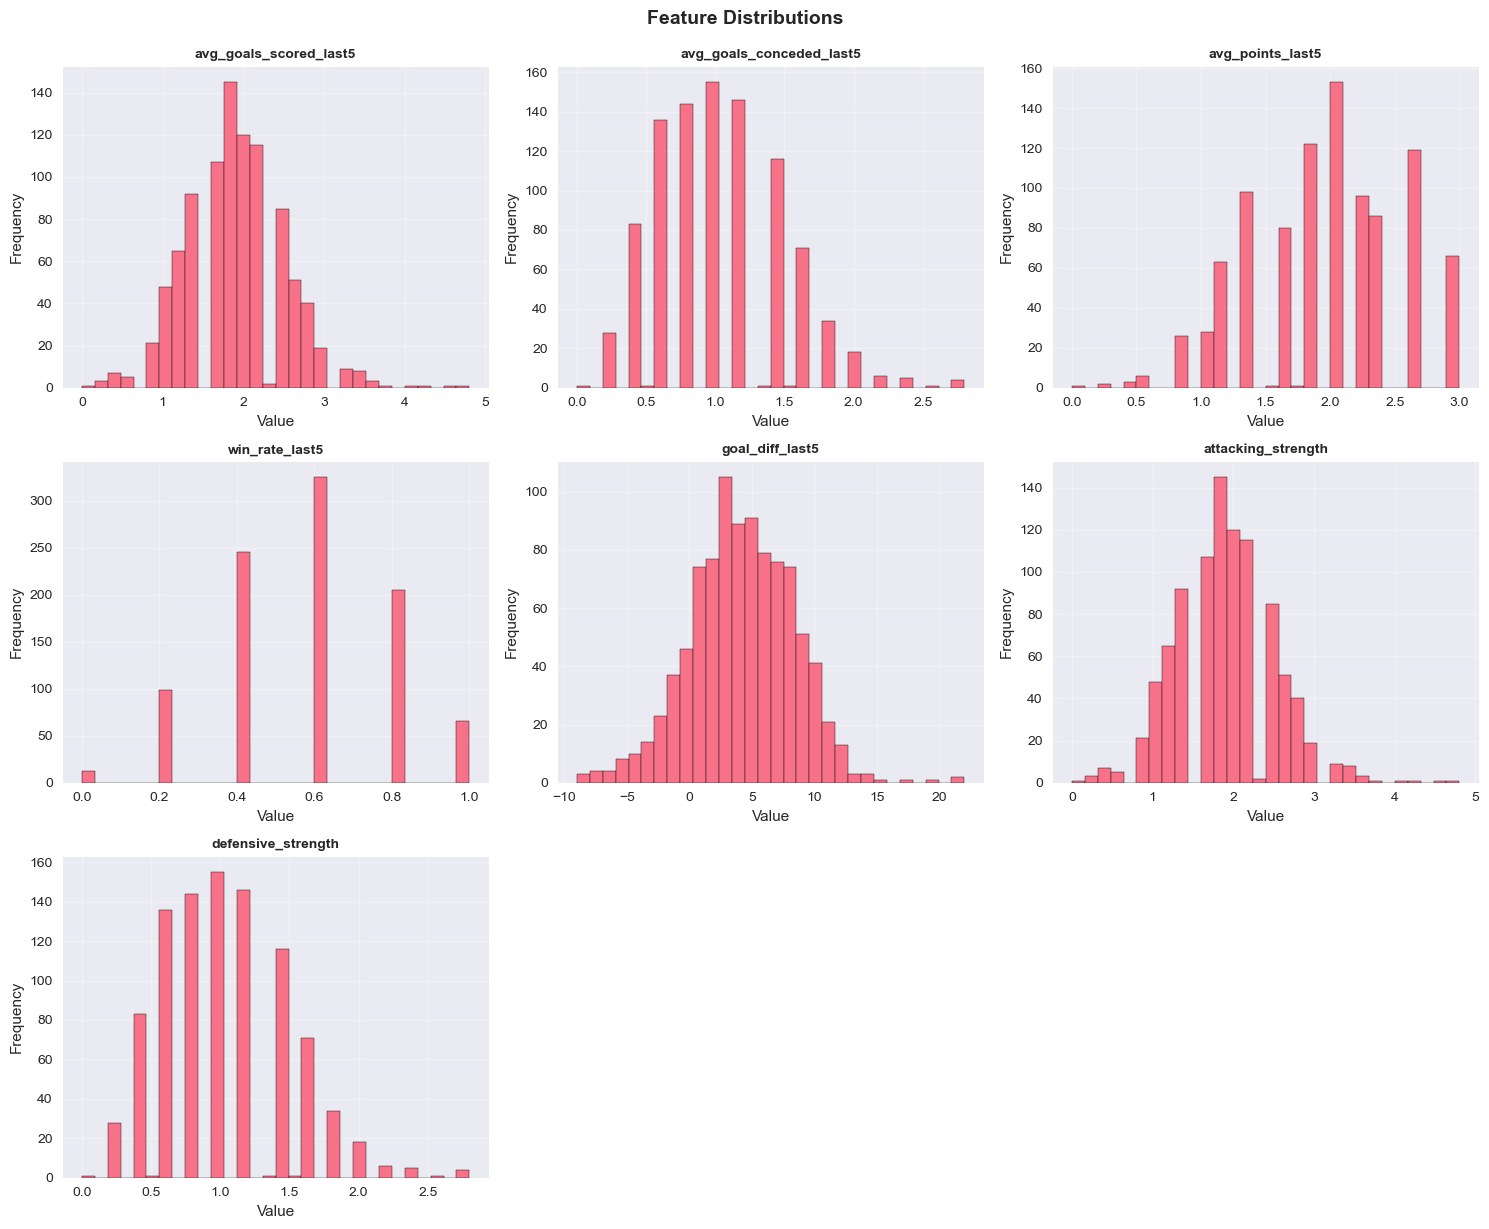

In [6]:
# Plot distributions of key features
key_features = [
    'avg_goals_scored_last5',
    'avg_goals_conceded_last5',
    'avg_points_last5',
    'win_rate_last5',
    'goal_diff_last5',
    'attacking_strength',
    'defensive_strength'
]

# Filter to only existing features
key_features = [f for f in key_features if f in df.columns]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    if i < len(axes):
        ax = axes[i]
        df[feature].hist(bins=30, ax=ax, edgecolor='black')
        ax.set_title(f'{feature}', fontsize=10, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)

# Hide unused subplots
for i in range(len(key_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('Feature Distributions', fontsize=14, fontweight='bold', y=1.02)
plt.show()


## Step 7: Feature Relationships with Target Variable


In [7]:
# Compare feature values by result
print("FEATURE VALUES BY RESULT")
print("=" * 60)

key_features = [
    'avg_goals_scored_last5',
    'avg_goals_conceded_last5',
    'avg_points_last5',
    'win_rate_last5',
    'goal_diff_last5',
    'attacking_strength',
    'defensive_strength'
]

# Filter to only existing features
key_features = [f for f in key_features if f in df.columns]

for feature in key_features:
    print(f"\n{feature}:")
    stats_by_result = df.groupby('Result')[feature].agg(['mean', 'median', 'std'])
    display(stats_by_result)


FEATURE VALUES BY RESULT

avg_goals_scored_last5:


,mean,median,std
Result,,,
Draw,1.916819,2.0,0.637146
Loss,1.875936,1.8,0.608549
Win,1.891743,1.8,0.596394



avg_goals_conceded_last5:


,mean,median,std
Result,,,
Draw,1.010198,1.0,0.429520
Loss,1.071658,1.0,0.472239
Win,1.026972,1.0,0.464816



avg_points_last5:


,mean,median,std
Result,,,
Draw,1.990639,2.0,0.589835
Loss,1.904813,2.0,0.544897
Win,1.938532,2.0,0.576103



win_rate_last5:


,mean,median,std
Result,,,
Draw,0.583562,0.6,0.230882
Loss,0.554255,0.6,0.216518
Win,0.570275,0.6,0.224421



goal_diff_last5:


,mean,median,std
Result,,,
Draw,4.520548,4.0,4.130141
Loss,4.021390,4.0,3.970262
Win,4.328440,4.0,3.992688



attacking_strength:


,mean,median,std
Result,,,
Draw,1.916819,2.0,0.637146
Loss,1.875936,1.8,0.608549
Win,1.891743,1.8,0.596394



defensive_strength:


,mean,median,std
Result,,,
Draw,1.010198,1.0,0.429520
Loss,1.071658,1.0,0.472239
Win,1.026972,1.0,0.464816


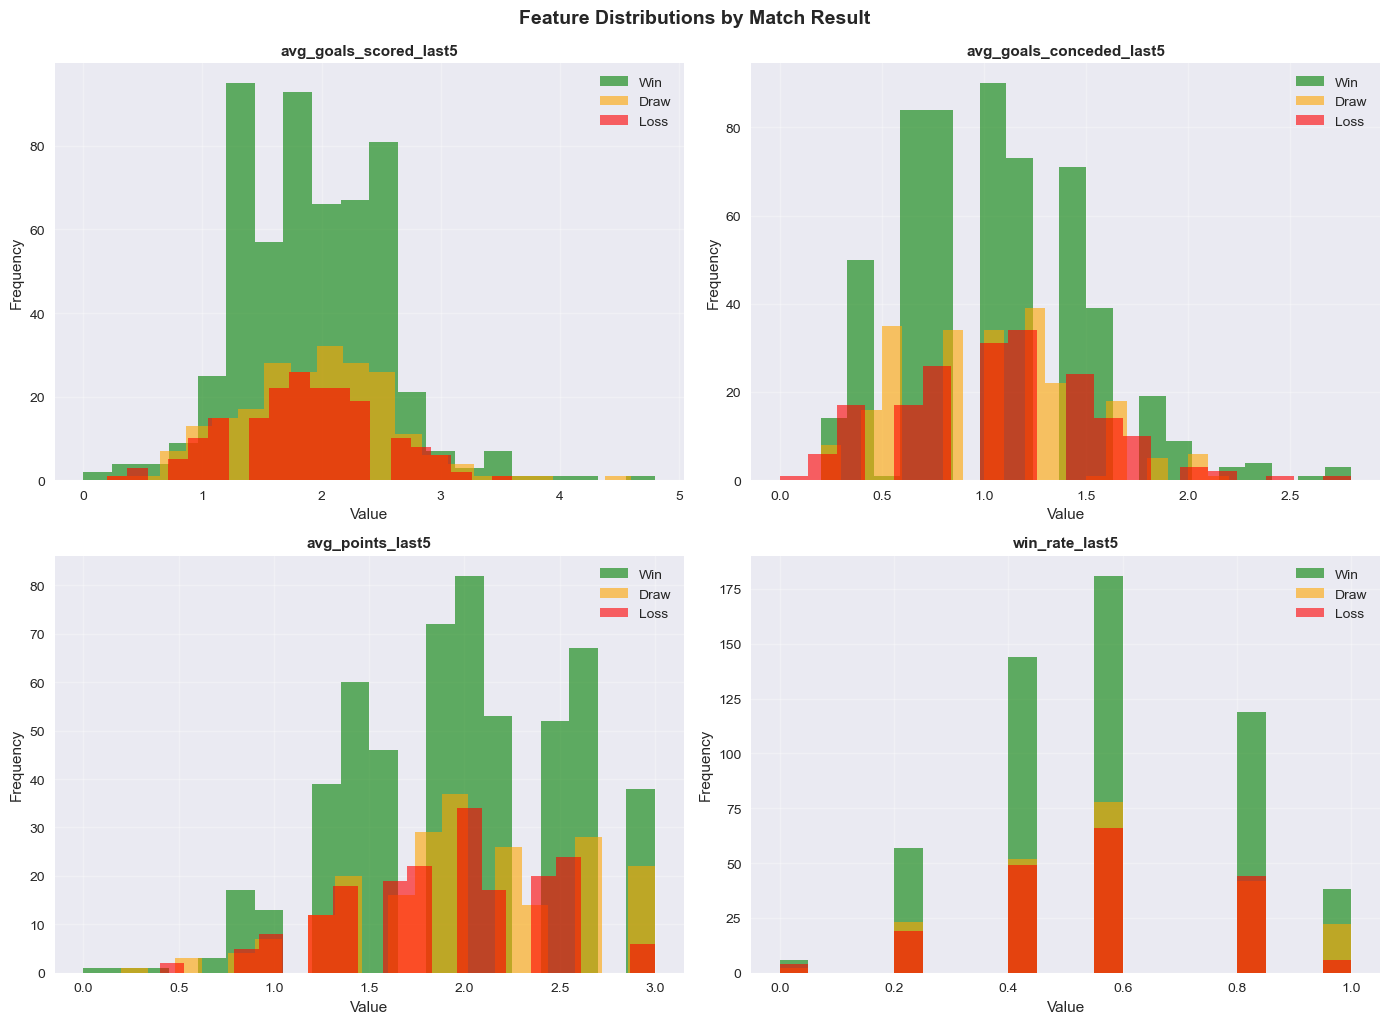

In [8]:
# Visualize feature distributions by result
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

features_to_plot = [
    'avg_goals_scored_last5',
    'avg_goals_conceded_last5',
    'avg_points_last5',
    'win_rate_last5'
]

# Filter to only existing features
features_to_plot = [f for f in features_to_plot if f in df.columns]

for i, feature in enumerate(features_to_plot):
    if i < len(axes):
        ax = axes[i]
        
        # Plot with different colors for results
        for result, color in [('Win', 'green'), ('Draw', 'orange'), ('Loss', 'red')]:
            mask = df['Result'] == result
            data = df[mask][feature].dropna()
            if len(data) > 0:
                ax.hist(data, alpha=0.6, label=result, bins=20, color=color)
        
        ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Feature Distributions by Match Result', fontsize=14, fontweight='bold', y=1.02)
plt.show()


## Step 8: Feature Correlations


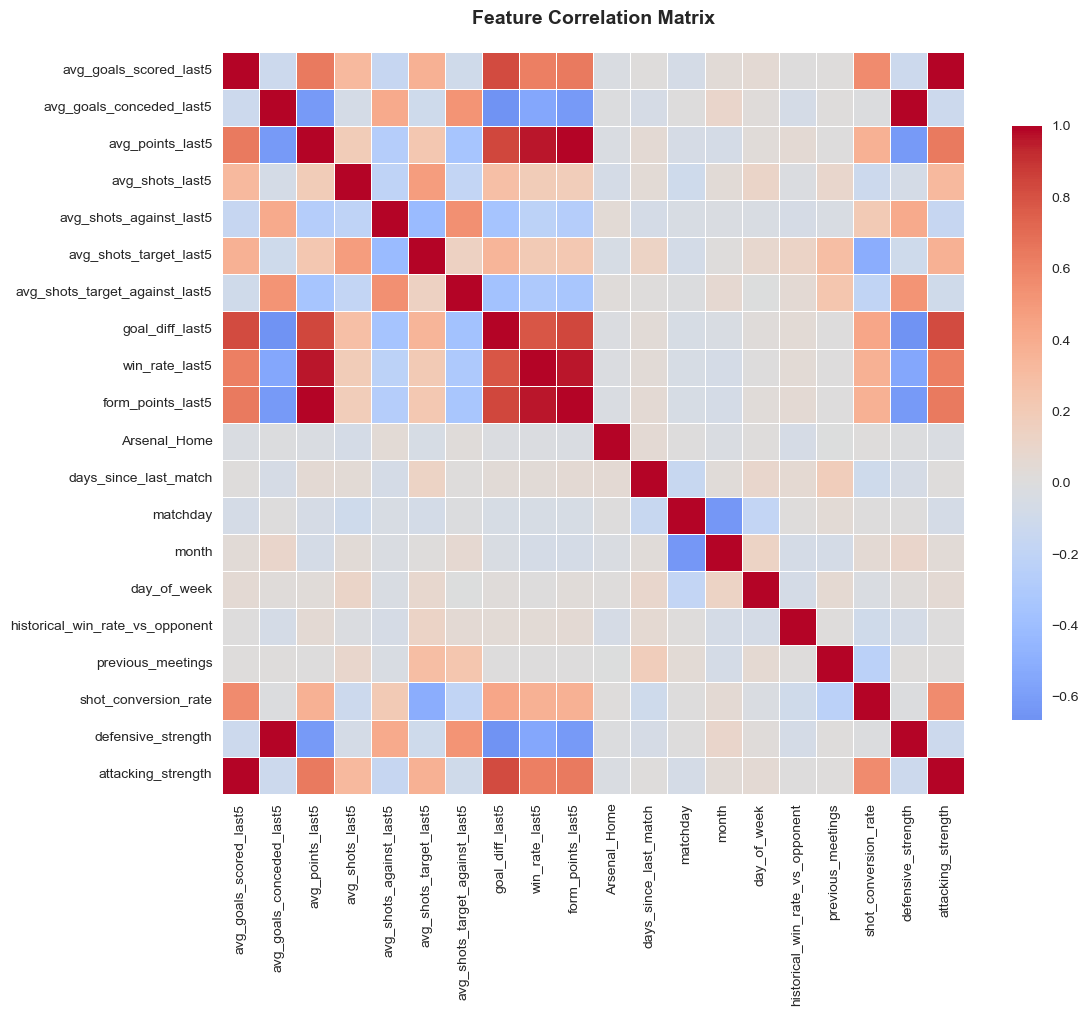


Highly Correlated Feature Pairs (|r| > 0.7):
  avg_goals_scored_last5 <-> goal_diff_last5: 0.823
  avg_goals_scored_last5 <-> attacking_strength: 1.000
  avg_goals_conceded_last5 <-> defensive_strength: 1.000
  avg_points_last5 <-> goal_diff_last5: 0.834
  avg_points_last5 <-> win_rate_last5: 0.962
  avg_points_last5 <-> form_points_last5: 0.998
  goal_diff_last5 <-> win_rate_last5: 0.782
  goal_diff_last5 <-> form_points_last5: 0.833
  goal_diff_last5 <-> attacking_strength: 0.823
  win_rate_last5 <-> form_points_last5: 0.962


In [9]:
# Calculate correlation matrix
numeric_features = df[feature_columns].select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_features].corr()

# Plot correlation heatmap (limit to reasonable size)
if len(numeric_features) > 20:
    # For large feature sets, show top correlated features only
    print("Note: Showing correlation for top features only (too many to display all)")
    top_features = numeric_features[:20]
    corr_matrix = df[top_features].corr()
else:
    top_features = numeric_features

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated features
print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_val
            ))

if high_corr_pairs:
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} <-> {feat2}: {corr:.3f}")
else:
    print("  No highly correlated pairs found.")


## Step 9: Feature Importance (Preliminary)


FEATURE IMPORTANCE (Correlation with Target)

Top features by absolute correlation with Result:
 1. Arsenal_Home                       : 0.2248
 2. previous_meetings                  : 0.0755
 3. historical_win_rate_vs_opponent    : 0.0374
 4. day_of_week                        : 0.0357
 5. avg_shots_target_against_last5     : 0.0337
 6. avg_shots_against_last5            : 0.0328
 7. defensive_strength                 : 0.0293
 8. avg_goals_conceded_last5           : 0.0293
 9. goal_diff_last5                    : 0.0209
10. win_rate_last5                     : 0.0180
11. avg_points_last5                   : 0.0101
12. form_points_last5                  : 0.0098
13. avg_shots_target_last5             : 0.0088
14. month                              : 0.0079
15. avg_goals_scored_last5             : 0.0044


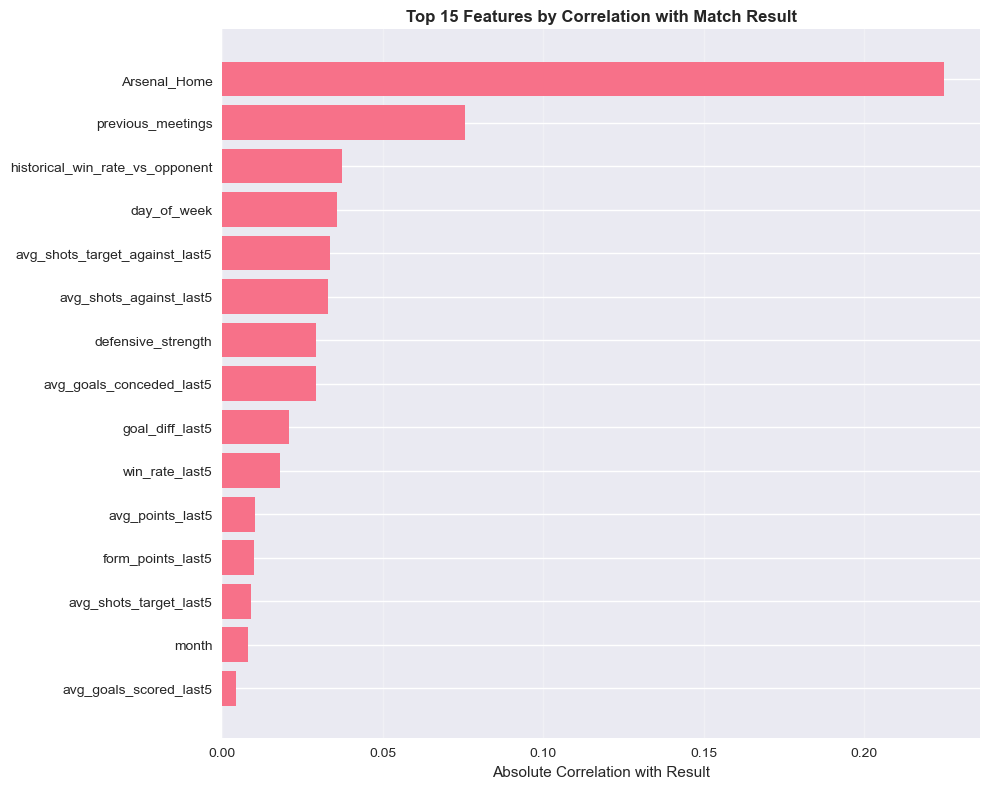

In [10]:
# Quick feature importance using correlation with target
# Convert target to numeric for correlation
df_numeric = df.copy()
df_numeric['Result_encoded'] = df_numeric['Result'].map({'Win': 1, 'Draw': 0.5, 'Loss': 0})

# Calculate correlation with target
numeric_features = df[feature_columns].select_dtypes(include=[np.number]).columns.tolist()
target_corr = df_numeric[numeric_features + ['Result_encoded']].corr()['Result_encoded'].drop('Result_encoded')
target_corr = target_corr.abs().sort_values(ascending=False)

print("FEATURE IMPORTANCE (Correlation with Target)")
print("=" * 60)
print("\nTop features by absolute correlation with Result:")
for i, (feature, corr) in enumerate(target_corr.head(15).items(), 1):
    print(f"{i:2d}. {feature:35s}: {corr:.4f}")

# Visualize
plt.figure(figsize=(10, 8))
top_features = target_corr.head(15)
plt.barh(range(len(top_features)), top_features.values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Absolute Correlation with Result')
plt.title('Top 15 Features by Correlation with Match Result', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


## Step 10: Temporal Analysis


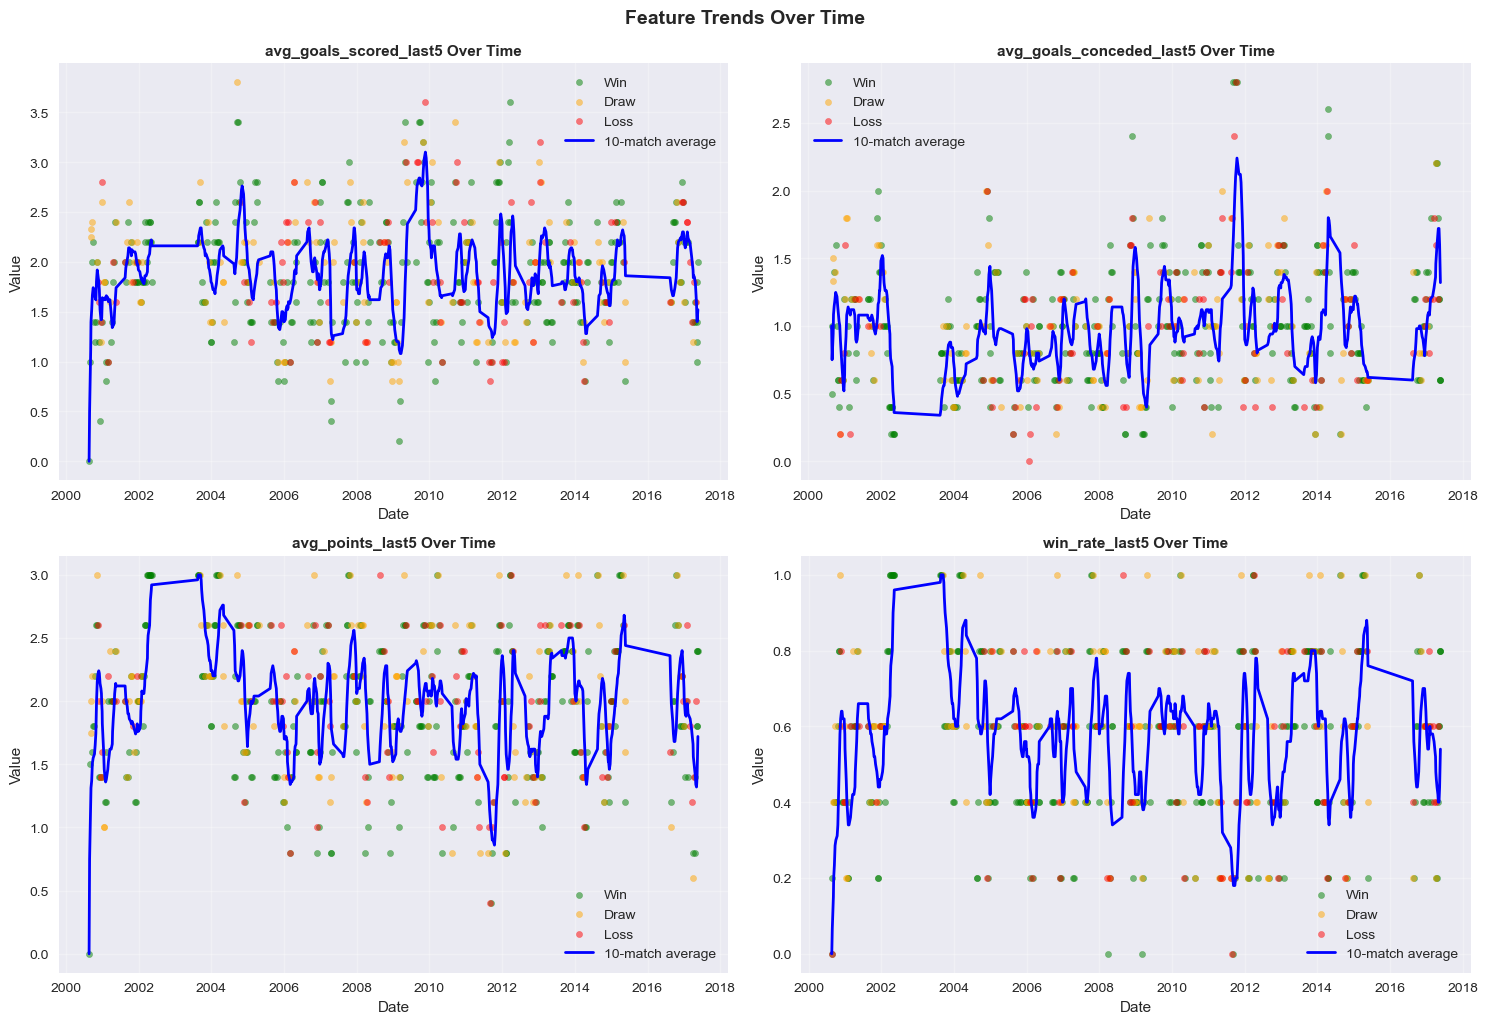

In [11]:
# Analyze features over time
df_sorted = df.sort_values('Date')

# Plot key features over time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

features_to_plot = [
    'avg_goals_scored_last5',
    'avg_goals_conceded_last5',
    'avg_points_last5',
    'win_rate_last5'
]

# Filter to only existing features
features_to_plot = [f for f in features_to_plot if f in df_sorted.columns]

for i, feature in enumerate(features_to_plot):
    if i < len(axes):
        ax = axes[i]
        
        # Plot with different colors for results
        for result, color in [('Win', 'green'), ('Draw', 'orange'), ('Loss', 'red')]:
            mask = df_sorted['Result'] == result
            data = df_sorted[mask][feature].dropna()
            if len(data) > 0:
                ax.scatter(df_sorted[mask]['Date'], df_sorted[mask][feature], 
                          alpha=0.5, label=result, s=20, color=color)
        
        # Rolling average line
        rolling_mean = df_sorted[feature].rolling(window=10, min_periods=1).mean()
        ax.plot(df_sorted['Date'], rolling_mean, 'b-', linewidth=2, label='10-match average')
        
        ax.set_title(f'{feature} Over Time', fontsize=11, fontweight='bold')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Feature Trends Over Time', fontsize=14, fontweight='bold', y=1.02)
plt.show()


## Step 11: Summary and Insights


In [12]:
print("FEATURE EXPLORATION SUMMARY")
print("=" * 60)

print(f"\n1. Dataset Overview:")
print(f"   - Total matches: {len(df):,}")
print(f"   - Total features: {len(feature_columns)}")
print(f"   - Date range: {df['Date'].min()} to {df['Date'].max()}")

print(f"\n2. Target Distribution:")
result_dist = df['Result'].value_counts(normalize=True) * 100
for result, pct in result_dist.items():
    print(f"   - {result}: {pct:.1f}%")

print(f"\n3. Missing Values:")
missing_count = df[feature_columns].isnull().sum().sum()
total_cells = len(df) * len(feature_columns)
missing_pct = (missing_count / total_cells * 100) if total_cells > 0 else 0
print(f"   - Missing values: {missing_count:,} ({missing_pct:.2f}%)")

print(f"\n4. Top Features (by correlation with target):")
if 'target_corr' in locals():
    for i, (feature, corr) in enumerate(target_corr.head(5).items(), 1):
        print(f"   {i}. {feature}: {corr:.4f}")

print(f"\n5. Key Insights:")
print(f"   - Features are ready for modeling")
print(f"   - No data leakage (all features use past information)")
print(f"   - Rolling window features capture recent form")
print(f"   - Match context features provide additional information")

print(f"\n6. Next Steps:")
print(f"   - Proceed to model training")
print(f"   - Use top features for initial models")
print(f"   - Consider feature selection if needed")


FEATURE EXPLORATION SUMMARY

1. Dataset Overview:
   - Total matches: 952
   - Total features: 20
   - Date range: 2000-08-19 00:00:00 to 2017-05-21 00:00:00

2. Target Distribution:
   - Win: 57.2%
   - Draw: 23.0%
   - Loss: 19.7%

3. Missing Values:
   - Missing values: 795 (4.18%)

4. Top Features (by correlation with target):
   1. Arsenal_Home: 0.2248
   2. previous_meetings: 0.0755
   3. historical_win_rate_vs_opponent: 0.0374
   4. day_of_week: 0.0357
   5. avg_shots_target_against_last5: 0.0337

5. Key Insights:
   - Features are ready for modeling
   - No data leakage (all features use past information)
   - Rolling window features capture recent form
   - Match context features provide additional information

6. Next Steps:
   - Proceed to model training
   - Use top features for initial models
   - Consider feature selection if needed
